In [346]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings. filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import Image  
import pydotplus


### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [347]:
# Code starts here
train=pd.read_csv("train.csv")
# Code ends here

In [348]:
train.head()

,Id,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,6269,LA006270,Yes,debt_consolidation,12.53%,689.41,11.513725,14.45,722,4291.000000,13171,51.8,0,Less than 5,No,Yes
1,1460,LA001461,Yes,credit_card,10.20%,485.42,10.315597,12.87,752,5789.958333,14857,31.3,0,Less than 5,Yes,Yes
2,5539,LA005540,Yes,debt_consolidation,12.87%,121.08,11.238436,1.58,692,3391.000000,12135,85.5,0,Less than 5,No,Yes
3,9020,LA009021,No,all_other,15.37%,348.47,11.142007,11.01,687,5370.000000,10631,35.3,0,Less than 10,No,Yes
4,4365,LA004366,Yes,debt_consolidation,14.61%,344.76,10.308953,11.36,672,2429.958333,10544,57.0,0,Less than 5,Yes,Yes


In [349]:
train.drop(['Id','customer.id','inq.last.6mths','pub.rec'],axis=1,inplace=True)

In [350]:
train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,delinq.2yrs,paid.back.loan
0,Yes,debt_consolidation,12.53%,689.41,11.513725,14.45,722,4291.000000,13171,51.8,No,Yes
1,Yes,credit_card,10.20%,485.42,10.315597,12.87,752,5789.958333,14857,31.3,Yes,Yes
2,Yes,debt_consolidation,12.87%,121.08,11.238436,1.58,692,3391.000000,12135,85.5,No,Yes
3,No,all_other,15.37%,348.47,11.142007,11.01,687,5370.000000,10631,35.3,No,Yes
4,Yes,debt_consolidation,14.61%,344.76,10.308953,11.36,672,2429.958333,10544,57.0,Yes,Yes


In [351]:
train['revol.bal'].max()

952013

In [352]:
train['revol.bal'].min()

0

In [353]:
train.shape

(7662, 12)

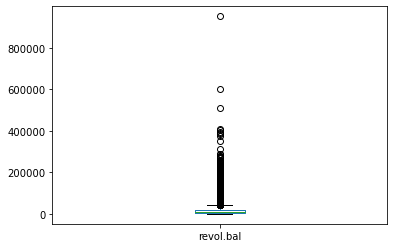

In [354]:
train['revol.bal'].plot(kind='box')

In [355]:
train_1=train[train['revol.bal'] < 300000]
train_1 = train_1.reset_index(drop=True)

#new_dataframe = a_dataframe[a_dataframe.B <= 3]
#new_dataframe = new_dataframe.reset_index(drop=True)

train_1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,delinq.2yrs,paid.back.loan
0,Yes,debt_consolidation,12.53%,689.41,11.513725,14.45,722,4291.000000,13171,51.8,No,Yes
1,Yes,credit_card,10.20%,485.42,10.315597,12.87,752,5789.958333,14857,31.3,Yes,Yes
2,Yes,debt_consolidation,12.87%,121.08,11.238436,1.58,692,3391.000000,12135,85.5,No,Yes
3,No,all_other,15.37%,348.47,11.142007,11.01,687,5370.000000,10631,35.3,No,Yes
4,Yes,debt_consolidation,14.61%,344.76,10.308953,11.36,672,2429.958333,10544,57.0,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7646,No,all_other,14.74%,34.54,11.034890,1.49,702,1080.000000,1914,44.5,No,No
7647,No,debt_consolidation,11.97%,166.00,10.308953,20.76,687,4079.958333,14536,68.9,No,Yes
7648,Yes,debt_consolidation,16.00%,457.05,11.418615,23.89,662,2190.000000,58686,80.8,No,Yes
7649,No,debt_consolidation,17.97%,225.86,10.645425,28.29,662,4188.000000,28432,57.1,Yes,No


In [356]:
train_1.shape 

(7651, 12)

In [357]:
train_1.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
delinq.2yrs          0
paid.back.loan       0
dtype: int64

In [358]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7651 entries, 0 to 7650
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7651 non-null   object 
 1   purpose            7651 non-null   object 
 2   int.rate           7651 non-null   object 
 3   installment        7651 non-null   float64
 4   log.annual.inc     7651 non-null   float64
 5   dti                7651 non-null   float64
 6   fico               7651 non-null   int64  
 7   days.with.cr.line  7651 non-null   float64
 8   revol.bal          7651 non-null   int64  
 9   revol.util         7651 non-null   float64
 10  delinq.2yrs        7651 non-null   object 
 11  paid.back.loan     7651 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 717.4+ KB


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

Yes    6438
No     1213
Name: paid.back.loan, dtype: int64
Yes    0.841459
No     0.158541
Name: paid.back.loan, dtype: float64


<BarContainer object of 2 artists>

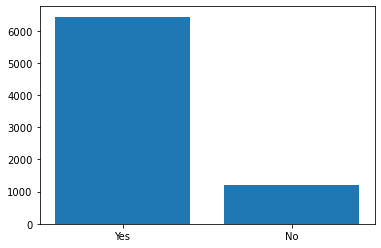

In [359]:
# Code starts here

fully_paid=train_1['paid.back.loan'].value_counts()
fully_paid_percentage=(train_1['paid.back.loan'].value_counts())/len(train_1['paid.back.loan'])
print(fully_paid)
print(fully_paid_percentage)
plt.bar(fully_paid.index,fully_paid)
# Code ends here.

In [360]:
train_1['int.rate']=train_1['int.rate'].map(lambda x: str(x)[:-1])
train_1['int.rate']=train_1['int.rate'].astype(float)/100

In [361]:
train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,delinq.2yrs,paid.back.loan
0,Yes,debt_consolidation,12.53%,689.41,11.513725,14.45,722,4291.000000,13171,51.8,No,Yes
1,Yes,credit_card,10.20%,485.42,10.315597,12.87,752,5789.958333,14857,31.3,Yes,Yes
2,Yes,debt_consolidation,12.87%,121.08,11.238436,1.58,692,3391.000000,12135,85.5,No,Yes
3,No,all_other,15.37%,348.47,11.142007,11.01,687,5370.000000,10631,35.3,No,Yes
4,Yes,debt_consolidation,14.61%,344.76,10.308953,11.36,672,2429.958333,10544,57.0,Yes,Yes


In [362]:
num_df=train_1.select_dtypes(include=['number']).copy()
cat_df=train_1.select_dtypes(include=['object']).copy()
num_df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
0,0.1253,689.41,11.513725,14.45,722,4291.000000,13171,51.8
1,0.1020,485.42,10.315597,12.87,752,5789.958333,14857,31.3
2,0.1287,121.08,11.238436,1.58,692,3391.000000,12135,85.5
3,0.1537,348.47,11.142007,11.01,687,5370.000000,10631,35.3
4,0.1461,344.76,10.308953,11.36,672,2429.958333,10544,57.0


In [363]:
cat_df.head()

,credit.policy,purpose,delinq.2yrs,paid.back.loan
0,Yes,debt_consolidation,No,Yes
1,Yes,credit_card,Yes,Yes
2,Yes,debt_consolidation,No,Yes
3,No,all_other,No,Yes
4,Yes,debt_consolidation,Yes,Yes


In [364]:
plt.figure(figsize=(20,20))
cols=list(num_df)
print(cols)


['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']


<Figure size 1440x1440 with 0 Axes>

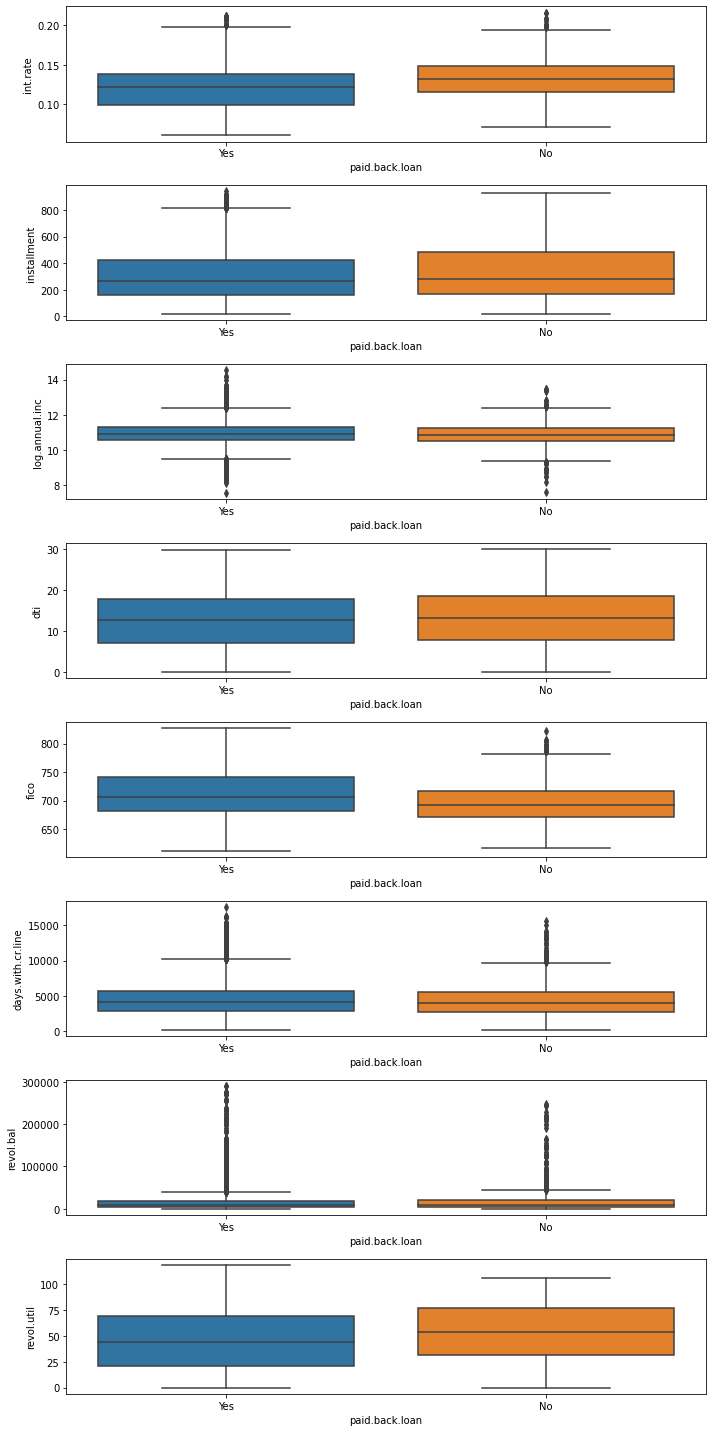

In [365]:
fig,axes=plt.subplots(8,1,figsize=(10,20))
for i in range(8):
    sns.boxplot(x=train_1['paid.back.loan'],y=num_df[cols[i]],ax=axes[i])
    fig.tight_layout()

In [366]:
cols1=list(cat_df)
cols1

['credit.policy', 'purpose', 'delinq.2yrs', 'paid.back.loan']

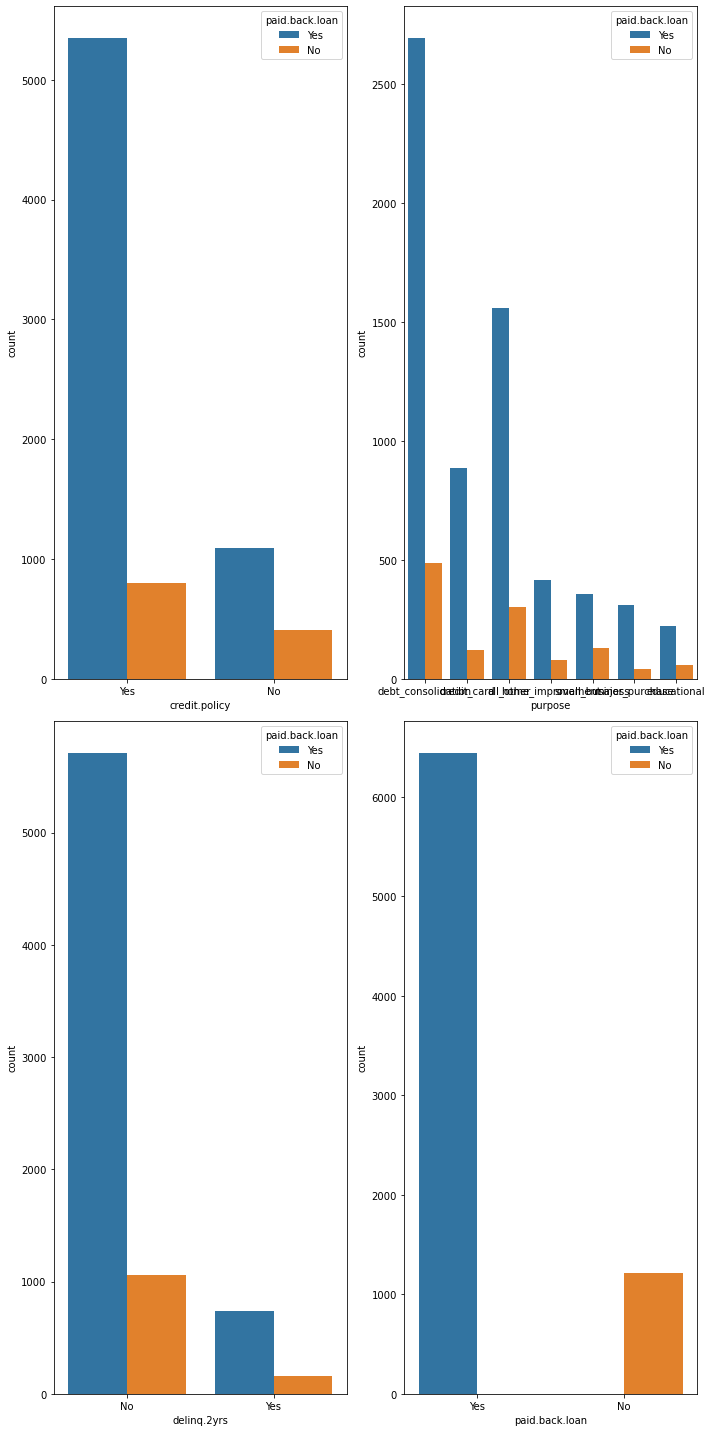

In [367]:
fig,axes=plt.subplots(2,2,figsize=(10,20))
for i in range(2):
    for j in range(2):
        sns.countplot(x=train_1[cols1[i*2+j]],hue=train_1['paid.back.loan'],ax=axes[i,j])
        fig.tight_layout()

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [368]:
# Code Starts here
X=train_1.drop('paid.back.loan',axis=1)
y=train_1['paid.back.loan']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)
le=LabelEncoder()
for col in cat_df.columns[:-1]:
    X_train[col].fillna('NA',inplace=True)
    X_test[col].fillna('NA',inplace=True)
    X_train[col]=le.fit_transform(X_train[col])
    X_test[col]=le.transform(X_test[col])
y_train.replace({'No':0,'Yes':1},inplace=True)  
y_test.replace({'No':0,'Yes':1},inplace=True)    
model=DecisionTreeClassifier(random_state=6)
model.fit(X_train,y_train)
score=model.score(X_test,y_test)
score
# Code ends here

0.7177700348432056

In [369]:
parameter_grid={'max_depth':np.arange(3,10),'min_samples_leaf':range(10,50,10)}
model_2=DecisionTreeClassifier(random_state=6)
p_tree=GridSearchCV(model_2,parameter_grid,cv=5)
p_tree.fit(X_train,y_train)
score_2=p_tree.score(X_test,y_test)
score_2

0.8336236933797909

In [370]:
print("Feature importances are:", dict(zip(train_1.columns, np.round(model.feature_importances_,3))))

Feature importances are: {'credit.policy': 0.022, 'purpose': 0.036, 'int.rate': 0.112, 'installment': 0.115, 'log.annual.inc': 0.108, 'dti': 0.132, 'fico': 0.081, 'days.with.cr.line': 0.114, 'revol.bal': 0.122, 'revol.util': 0.141, 'delinq.2yrs': 0.015}


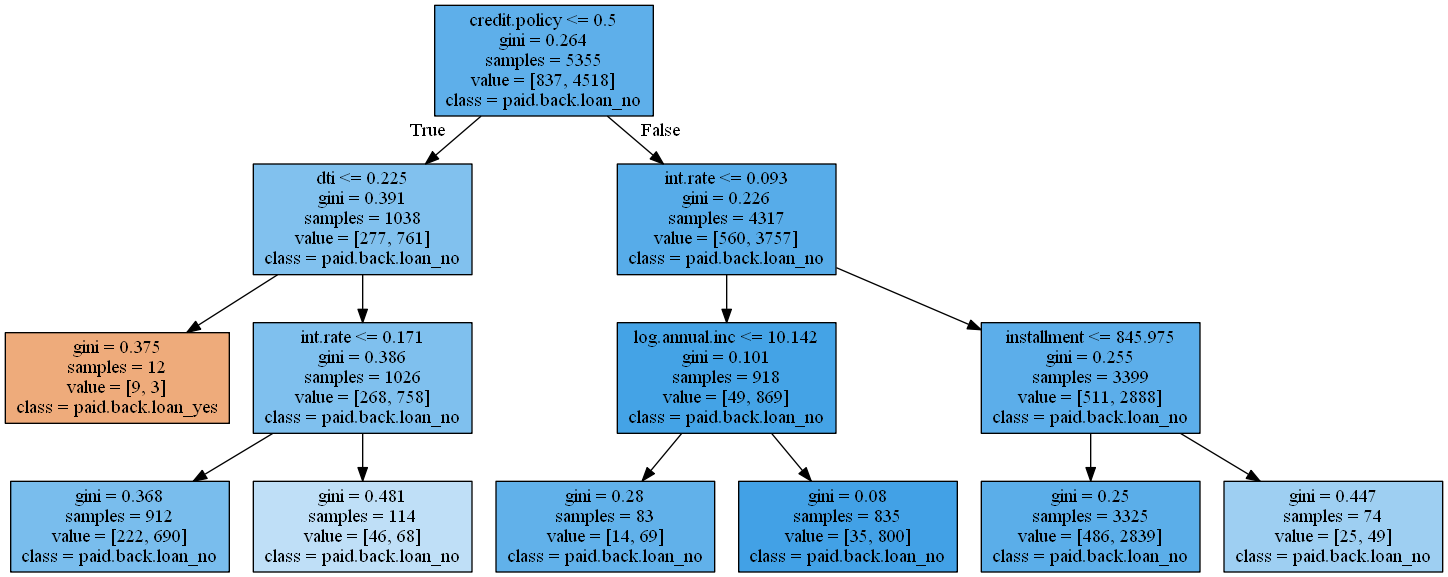

In [371]:
dot_data = tree.export_graphviz(decision_tree=p_tree.best_estimator_, out_file=None,
                                feature_names=X.columns, filled = True,  
                                class_names=['paid.back.loan_yes','paid.back.loan_no'])

# Draw graph
graph_big = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph_big.create_png())

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [372]:
# Code Starts here
test=pd.read_csv('test.csv')
Id=test['Id'].copy()
test.drop(['Id','customer.id','inq.last.6mths','pub.rec'],axis=1,inplace=True)


# Code ends here

In [373]:
test.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,delinq.2yrs
0,Yes,debt_consolidation,11.83%,497.01,11.385092,19.70,732,6481.958333,32725,41.9,No
1,Yes,all_other,14.96%,138.59,10.714418,1.79,682,1230.041667,1298,81.1,No
2,Yes,all_other,9.76%,80.39,9.998798,22.25,737,2404.041667,2574,10.5,No
3,Yes,debt_consolidation,16.32%,247.20,10.915088,3.99,662,2189.958333,4747,93.1,Yes
4,Yes,credit_card,8.00%,188.02,11.446786,13.27,752,2250.000000,7501,26.8,No


In [374]:
test['int.rate']=test['int.rate'].map(lambda x: str(x)[:-1])
test['int.rate']=test['int.rate'].astype(float)/100

In [375]:
test[col].fillna('NA',inplace=True)

In [376]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      1916 non-null   object 
 1   purpose            1916 non-null   object 
 2   int.rate           1916 non-null   float64
 3   installment        1916 non-null   float64
 4   log.annual.inc     1916 non-null   float64
 5   dti                1916 non-null   float64
 6   fico               1916 non-null   int64  
 7   days.with.cr.line  1916 non-null   float64
 8   revol.bal          1916 non-null   int64  
 9   revol.util         1916 non-null   float64
 10  delinq.2yrs        1916 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 164.8+ KB


In [377]:
cat=test.select_dtypes(include=['object']).copy()
cat.head()

,credit.policy,purpose,delinq.2yrs
0,Yes,debt_consolidation,No
1,Yes,all_other,No
2,Yes,all_other,No
3,Yes,debt_consolidation,Yes
4,Yes,credit_card,No


In [378]:
for col in cat.columns:
    test[col]=le.fit_transform(test[col])

In [379]:
y_pred = p_tree.predict(test)
y_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [380]:
sample_submission = pd.DataFrame({'Id':Id,'paid.back.loan':y_pred})
sample_submission['paid.back.loan'].replace({0:'No',1:'Yes'},inplace=True) 

# Convert the sample submission file into a csv file
sample_submission.to_csv('3rd_submission.csv',index=False)